## Assignment 1 - Data Science Technology and Systems PG

**Sher Afgan - u3247628**

## Notebook Summary
1.  Problem Statement
2.  Goal/Outcome

    **Part A**
3. Loading Datasets 
4.  Data Inspection 
5.  No of unique cusinies served by Sydney restaurants in 2018
6.  Top 3 suburbs with mos restaurants in Sydney 
7.  Agree or Disagree with 'Restaurants with excellent rating are mostly very expensive while those with poor rating are rarely expensive'
8.  Exploratory Data Analysis
    1. Explore numerical variables 
    2. Explore categorical variables 
    3. Visualize the missing values for important columns such as cost, cuisine, rating, and votes
    4. Find outliers in the cost variables. 
    5. Find the correlation between columns.
9.  Cuisine Denstiry Map

    **Part B**
10. Data Cleaning 
11. Data Encoding
12. Identify Source And Target Variables
13.  Split Data into separate training and test
14. Linear Regression (Model 1)
15. Linear Regression Using Gradient Descent Optimisation Function (Model 2)
16. Classification 

### 1. Problem Statement 
We are trying to analyze all restaurants in the Sydney area in 2018 with the objective of predicting each restaurant's potential success. As a data science student, the goal is to find the unknown patterns, or hidden gems that are impacting the performance of the resturants.

### 2. Outcome
The outcome of this project will provide insights into key determinants of restaurant success in Sydney.

## Part A
In part A, we will be importing and understanding data, document an exploratory data analysis and generate visual graphs to answer the questions.

In [615]:
import ast
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import category_encoders as ce
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


#### 3. Loading Datasets: Reading The Zomato Dataframe

In [616]:
zomato_df = pd.read_csv("./data/zomato_df_final_data.csv")
sydney_geo = gpd.read_file('./data/sydney.geojson')

#### 4. Data Inspection: Zomato Dataset

Before we start using the dataset, we will use the  

- Checking the total number of rows and columns.
- Printing column names and basic data types.
- Counting the number of features (columns).
- Identifying null or missing values.

In [617]:
rows, columns = zomato_df.shape
print(f"Total rows: {rows}")
print(f"Total columns: {columns} \n")

print("Feature (Column) Names:")
print(zomato_df.columns, "\n")

print("Dataframe information:")
print(zomato_df.info(), "\n")

Total rows: 10500
Total columns: 17 

Feature (Column) Names:
Index(['address', 'cost', 'cuisine', 'lat', 'link', 'lng', 'phone',
       'rating_number', 'rating_text', 'subzone', 'title', 'type', 'votes',
       'groupon', 'color', 'cost_2', 'cuisine_color'],
      dtype='object') 

Dataframe information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   address        10500 non-null  object 
 1   cost           10154 non-null  float64
 2   cuisine        10500 non-null  object 
 3   lat            10308 non-null  float64
 4   link           10500 non-null  object 
 5   lng            10308 non-null  float64
 6   phone          10500 non-null  object 
 7   rating_number  7184 non-null   float64
 8   rating_text    7184 non-null   object 
 9   subzone        10500 non-null  object 
 10  title          10500 non-null  object 
 11  type  

In [618]:
print("Missing values per column:")
print(zomato_df.isnull().sum())

Missing values per column:
address             0
cost              346
cuisine             0
lat               192
link                0
lng               192
phone               0
rating_number    3316
rating_text      3316
subzone             0
title               0
type               48
votes            3316
groupon             0
color               0
cost_2            346
cuisine_color       0
dtype: int64


#### 5. No of unique cusinies served by Sydney restaurants in 2018

The goal of this task is to analyze the different cuisines served by restaurants in Sydney in 2018. We will identify all unique cuisines, determine their frequency across the restaurants, and visualize the results using plots.

However, if we look at the dataset, the cusinies are stored in a array/list data structure. For example, a restaurant can have multiple cusinies. We need to handle this case.

We found that there are **134** unique cusinies is the given dataset.

Total number of unique cuisines found is: 134


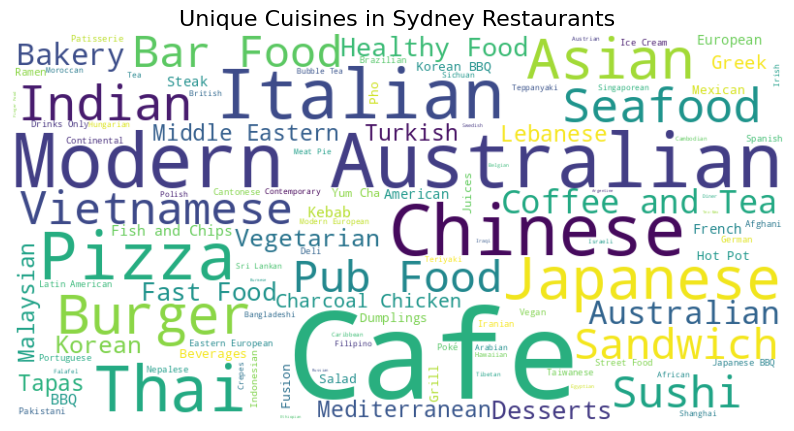

In [619]:
# Function to safely convert a string representation of a list into a list, if needed
def safely_convert_to_list(entry):
    if isinstance(entry, str): 
        try:
            return ast.literal_eval(entry) 
        except (ValueError, SyntaxError): 
            return [entry] 
    return entry

# Convert the string representation of lists into actual lists using ast.literal_eval
zomato_df['cuisine'] = zomato_df['cuisine'].apply(safely_convert_to_list)
zomato_df['type'] = zomato_df['type'].apply(safely_convert_to_list)

# Explode the 'cuisine' column to convert each list into separate rows
exploded_cuisines = zomato_df['cuisine'].explode()

# Get the unique cuisines
unique_cuisines = exploded_cuisines.unique()

# Convert to list and print
unique_cuisines_list = unique_cuisines.tolist()

print("Total number of unique cuisines found is:", unique_cuisines.size)

# Count the frequency of each unique cuisine in the exploded data
cuisine_counts = exploded_cuisines.value_counts()

# Generate word cloud for cuisine data
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(cuisine_counts)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title('Unique Cuisines in Sydney Restaurants', fontsize=16)
plt.show()

#### 6. Top 3 suburbs that have the highest number of restaurants
This task involved identifying the top three suburbs in Sydney with the highest number of restaurants. For this we will utilize the **subzone** column to help in our analysis. After analyzing the dataset, a bar plot was generated to visualize the restaurant distribution across these suburbs.

top 5 suburbs are
subzone
CBD             476
Surry Hills     260
Parramatta      225
Darlinghurst    188
Chinatown       174
Name: count, dtype: int64


/tmp/ipykernel_246666/169585049.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=suburb_counts[:3].values, y=suburb_counts[:3].index, palette='coolwarm')


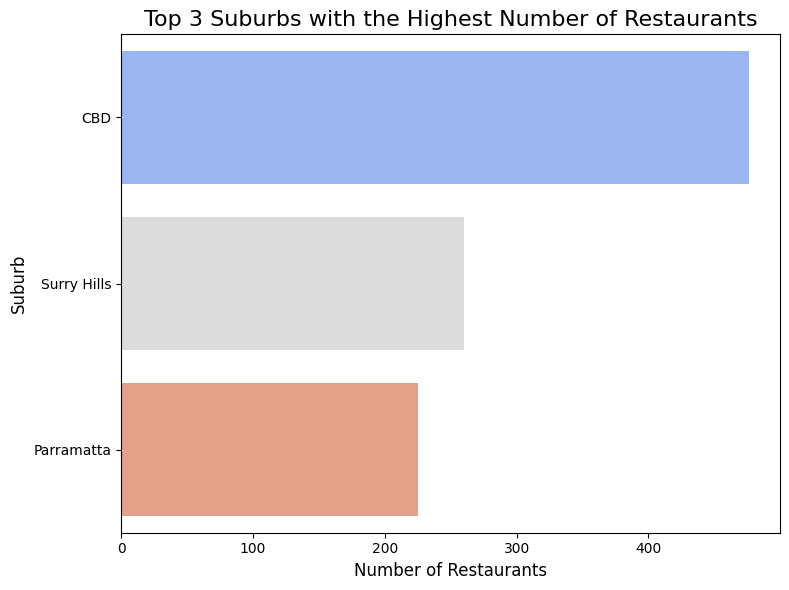

In [620]:
# Count the number of restaurants in each suburb (subzone in the dataset)
suburb_counts = zomato_df['subzone'].value_counts()

print("top 5 suburbs are")
print(suburb_counts[0:5])

# Plot the top 3 suburbs with the highest number of restaurants
plt.figure(figsize=(8, 6))
sns.barplot(x=suburb_counts[:3].values, y=suburb_counts[:3].index, palette='coolwarm')

# Adding labels and title
plt.title('Top 3 Suburbs with the Highest Number of Restaurants', fontsize=16)
plt.xlabel('Number of Restaurants', fontsize=12)
plt.ylabel('Suburb', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

#### 7. Do I agree or disagree with the statement ___Restaurants with 'excellent' ratings are mostly costly while those with 'poor'___.

After generating the cost distribution for ecxcellent and poor rated restaurants, I agree with the given statement based on the result that I have generated. I have found that the median cost for "Excellent" rated restaurants is higher compared to "Poor" rated ones. The range (interquartile range, or IQR) for "Excellent" restaurants generally shows higher costs, indicating that higher-end restaurants are more likely to receive excellent ratings. "Poor" rated restaurants tend to have a lower cost, with fewer outliers in the higher cost range.

/tmp/ipykernel_246666/3915055.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='rating_text', y='cost', data=df_filtered, palette="coolwarm")


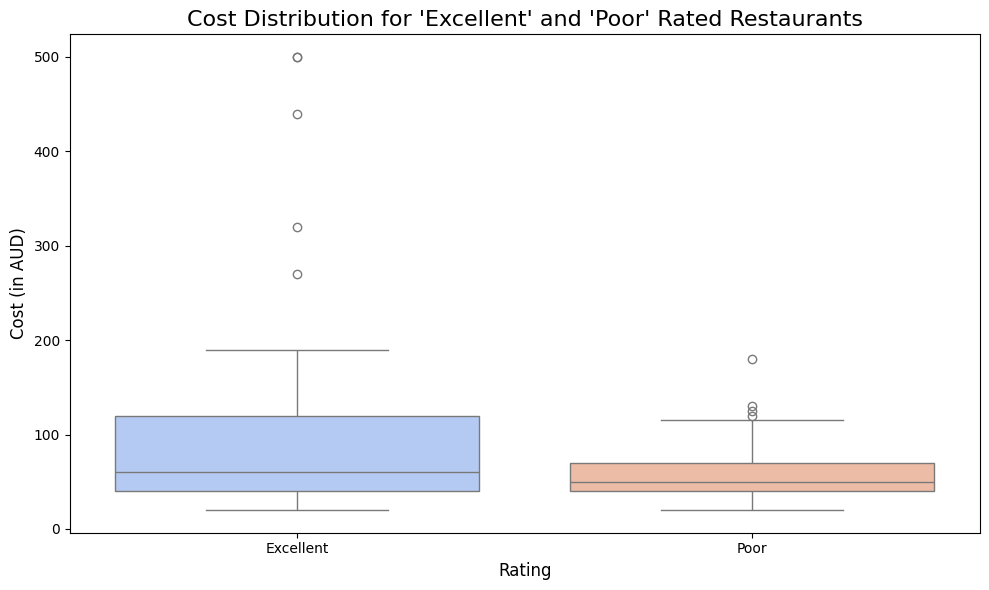

In [621]:
# Filter the dataframe for 'Excellent' and 'Poor' ratings
df_filtered = zomato_df[zomato_df['rating_text'].isin(['Excellent', 'Poor'])]

# Create a boxplot to show the distribution of cost for 'Excellent' and 'Poor' ratings
plt.figure(figsize=(10, 6))
sns.boxplot(x='rating_text', y='cost', data=df_filtered, palette="coolwarm")
plt.title("Cost Distribution for 'Excellent' and 'Poor' Rated Restaurants", fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Cost (in AUD)', fontsize=12)
plt.tight_layout()
plt.show()


### 8. Exploratory Data Analysis 

Before moving the modeling part, we will try to analyze our data further to discover hidden patterns, relationships, finding missing values and outliers. 

1. Explore numerical variables 
2. Explore categorical variables 
3. Visualize the missing values for important columns such as cost, cuisine, rating, votes and subzone
4. Find outliers in the cost variables. 
5. Find the correlation between columns.

#### Displaying Numerical Variables
We identify the numerical variables by checking the variables data types and if they are not object then they are numerical. We can also check for specific types such as int64, float64 etc.

In [622]:
numerical = [var for var in zomato_df.columns if zomato_df[var].dtypes != 'O']
print("numerical variables are", numerical)

numerical variables are ['cost', 'lat', 'lng', 'rating_number', 'votes', 'groupon', 'cost_2']


#### Displaying Categorial Variables
We identify the numerical variables by checking the variables data types and if they are not object then they are numerical. We can also check for specific types such as int64, float64 etc.

In [623]:
categorical = [var for var in zomato_df.columns if zomato_df[var].dtypes == 'O']
print("non numerical variables are", categorical)

non numerical variables are ['address', 'cuisine', 'link', 'phone', 'rating_text', 'subzone', 'title', 'type', 'color', 'cuisine_color']


#### Missing values in numerical variables
Identifying missing values per column is a critical step in data analysis because missing data can significantly impact the results of your analysis or model. Identifying them helps assess the overall quality of your dataset, which is crucial before performing any analysis. From the above graph we can see that cost, rating and votes all have missing values.

The groupon do not have any missing values, the rating_number and votes have the highest number of missing values.

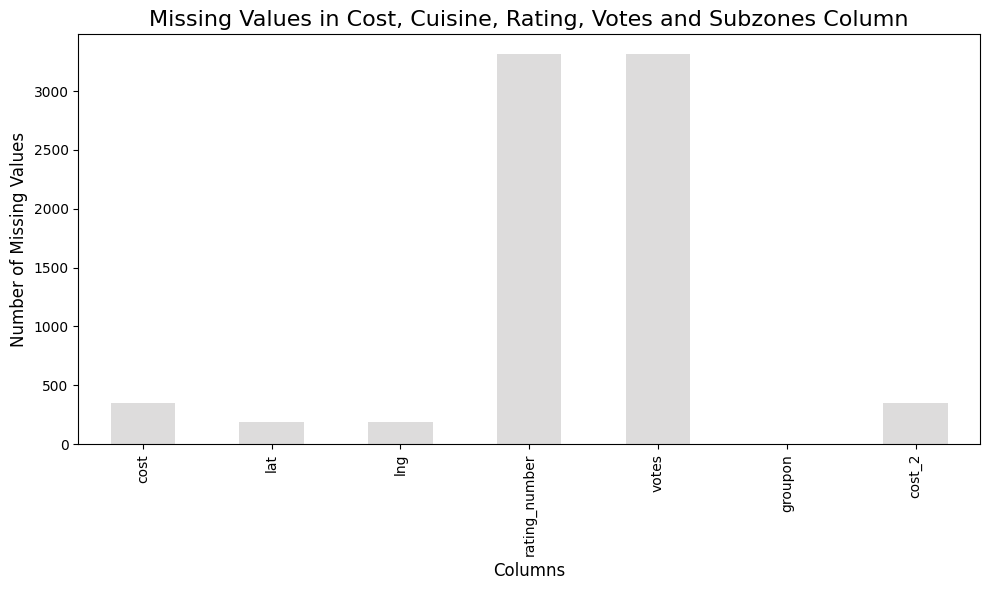

In [624]:
# Calculate the number of missing values per column
missing_data = zomato_df[numerical].isnull().sum()

# Create a bar plot for missing values
plt.figure(figsize=(10, 6))
missing_data.plot(kind='bar', color=plt.get_cmap('coolwarm')(0.5))
plt.title('Missing Values in Cost, Cuisine, Rating, Votes and Subzones Column', fontsize=16)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Number of Missing Values', fontsize=12)
plt.tight_layout()
plt.show()

#### Analyzing outliers in numerical variables
We will do the outliers analysis on the most important numerical variables such as cost, and votes because identifying and understanding outliers can provide valuable insights into the data and help improve the quality of statistical models and interpretations.

##### Results:
It looks like there are many outliers in the cost column. However, we will not be removing these entries because this is real data and the cost variability is expected. Similarly, these outliers may indicate unique business strategies or customer demographics that are valuable for analysis. Also, outliers do not always represent errors. 

In [625]:
df = zomato_df
# helper funciton to find outliers in the given variable 
def find_outliers(variable, factor= 3, print_summary=True):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    Lower_boundary = df[variable].quantile(0.25) - (IQR * factor)
    Upper_boundary = df[variable].quantile(0.75) + (IQR * factor)
    
    outliers= []
    for index, val in enumerate(df[variable]):
        if val < Lower_boundary or val > Upper_boundary:
            outliers.append(index)
    
    
    if(print_summary):
        print('{variable} outliers are values < {lowerboundary} or > {upperboundary}'.format(variable= variable, lowerboundary=Lower_boundary, upperboundary=Upper_boundary))
    return Lower_boundary, Upper_boundary, outliers

In [626]:
_,_,_ = find_outliers('cost')
_,_,_ = find_outliers('cost_2')
_,_,_ = find_outliers('votes')
_,_,_ = find_outliers('rating_number')

cost outliers are values < -60.0 or > 150.0
cost_2 outliers are values < -3.252032521 or > 12.967479676
votes outliers are values < -213.0 or > 312.0
rating_number outliers are values < 1.1999999999999997 or > 5.4


/tmp/ipykernel_246666/2608798751.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=zomato_df['cost'], palette="coolwarm")


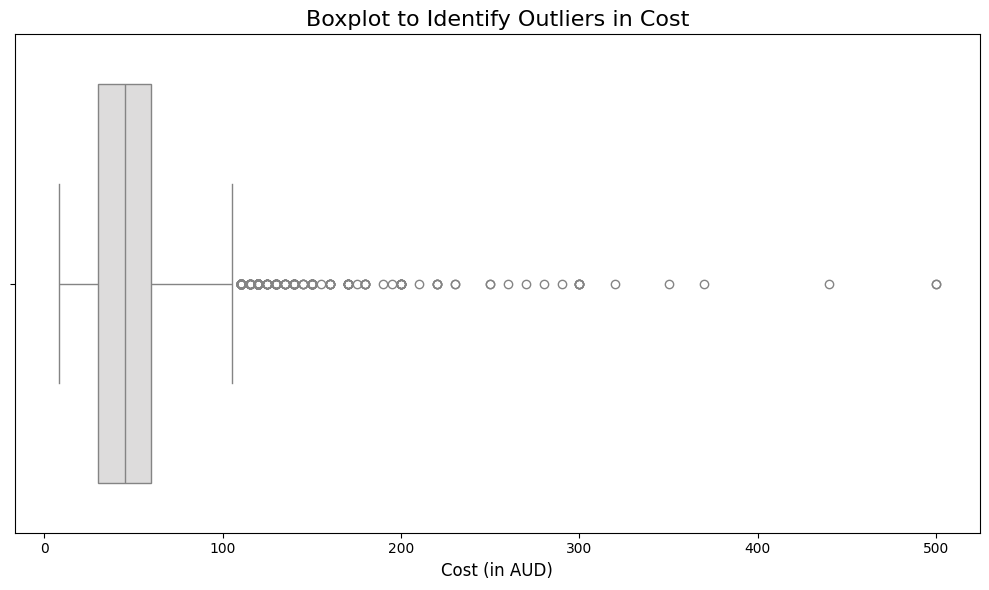

In [627]:
# Create a boxplot for the 'cost' variable to detect outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=zomato_df['cost'], palette="coolwarm")

# Adding labels and title
plt.title('Boxplot to Identify Outliers in Cost', fontsize=16)
plt.xlabel('Cost (in AUD)', fontsize=12)
plt.tight_layout()
plt.show()

It looks like there are many outliers in the cost column. However, we will not be removing these entries because this is real data and the cost variability is expected. Similarly, these outliers may indicate unique business strategies or customer demographics that are valuable for analysis. Also, outliers do not always represent errors. 

#### Correlation Matrix 
The correlation matrix tells us that cost and cost_2 columns are directly related and represent the same thing. This is why we will only use cost variable as one of our target variable going forward instead of cost_2.

Also we found that votes and rating have a high correlation value of 0.53.

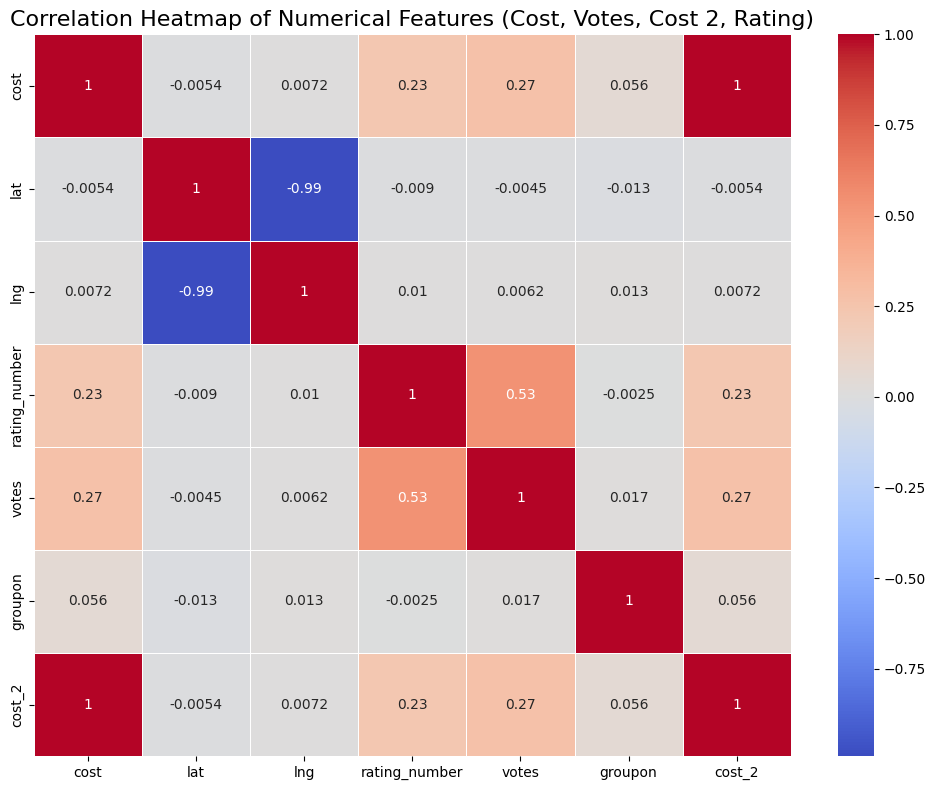

In [628]:
# Calculate the correlation matrix
corr_matrix = zomato_df[numerical].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Adding labels and title
plt.title('Correlation Heatmap of Numerical Features (Cost, Votes, Cost 2, Rating)', fontsize=16)
plt.tight_layout()
plt.show()

### 9. Cuisine Density Map 

Now we have created a cuisine_density_map helper function that takes cuisine type as one of the argument and generate the color coded map by the number of restaurants serving

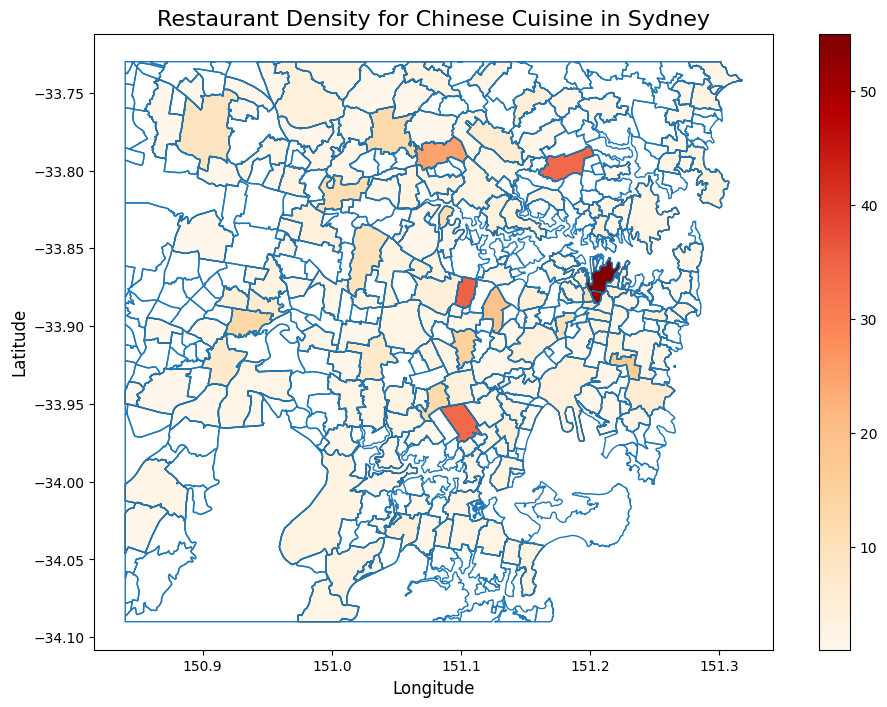

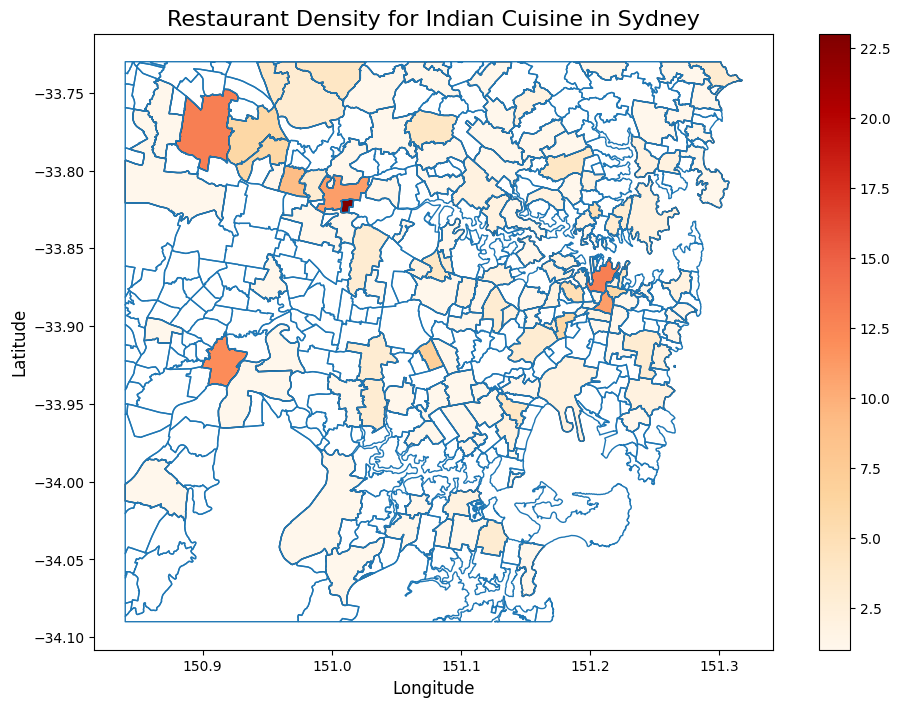

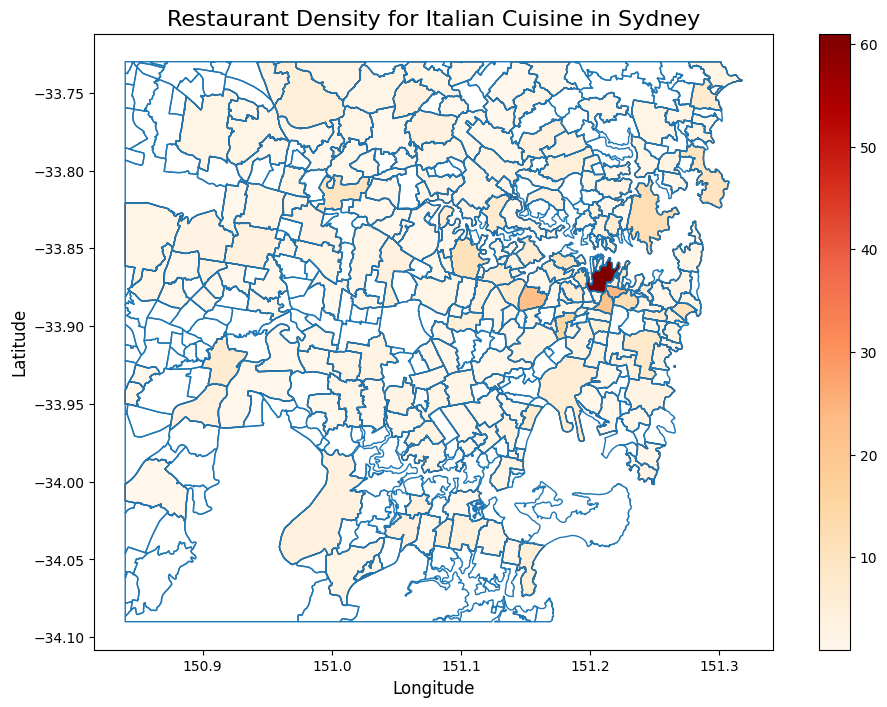

In [629]:
def cuisine_density_map(restaurant_data, sydney_geo, cuisine_type):
    filtered_restaurants = restaurant_data[restaurant_data['cuisine'].apply(lambda x: cuisine_type in x)]

    # Convert the restaurant data into a GeoDataFrame using lat/lng as the geometry
    gdf_restaurants = gpd.GeoDataFrame(filtered_restaurants, 
                                       geometry=gpd.points_from_xy(filtered_restaurants['lng'], filtered_restaurants['lat']),
                                       crs="EPSG:4326")

    # Perform a spatial join to find which suburb each restaurant is located in
    restaurants_in_suburbs = gpd.sjoin(gdf_restaurants, sydney_geo, how="inner", predicate='within')

    # Count the number of restaurants in each suburb for the selected cuisine
    suburb_density = restaurants_in_suburbs.groupby('SSC_NAME').size().reset_index(name='restaurant_count')

    # Merge the density data with the geojson file based on SSC_NAME (suburb name)
    sydney_geo = sydney_geo.merge(suburb_density, how='left', left_on='SSC_NAME', right_on='SSC_NAME')

    # Plot the map
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    sydney_geo.boundary.plot(ax=ax, linewidth=1)
    sydney_geo.plot(column='restaurant_count', ax=ax, legend=True, cmap='OrRd', edgecolor='black')

    # Add title and labels
    plt.title(f'Restaurant Density for {cuisine_type} Cuisine in Sydney', fontsize=16)
    plt.xlabel('Longitude', fontsize=12)
    plt.ylabel('Latitude', fontsize=12)
    
    plt.show()

cuisine_density_map(zomato_df, sydney_geo, 'Chinese')
cuisine_density_map(zomato_df, sydney_geo, 'Indian')
cuisine_density_map(zomato_df, sydney_geo, 'Italian')

## Part B

In this section we will do try to do predictive modelling using linear regression, but before that we need to prepare our data. We have already found out the missing values, now we need a way to handle those missing values, maybe remove unimportant columns, and encode data values and perform necessary feature engineering steps to help in our predictive modelling.

### Dropping Irrelevant Columns 

Before, we do any kind of data cleaning, I am going to remomve all the irrevelant columns that are not important for this case studies or our predictive modelling.

I am going to remove `title`, `address`, `phone`, `color`, `cuisine_color`, `rating_text` as I will not be using any of these in my analysis

In [630]:
# Removing irrelevant columns
zomato_df = zomato_df.drop(['address', 'phone', 'color', 'title', 'cuisine_color', 'rating_text', 'link'], axis=1)
print(zomato_df.columns)

categorical = [var for var in zomato_df.columns if zomato_df[var].dtypes == 'O']

Index(['cost', 'cuisine', 'lat', 'lng', 'rating_number', 'subzone', 'type',
       'votes', 'groupon', 'cost_2'],
      dtype='object')


### Handle Missing Values

We are going to handle null values in our both numerical variables like cost, rating_number and votes and non categorical variables like type.


#### Using Median For Cost Missing Values 
For cost, we are replacing the missing value with the median because cost data contains outliers as shown in the EDA section above. The median is the middle value when the data is sorted, which makes it less sensitive to outliers compared to the mean. For example, if most restaurant costs are around $20, but one restaurant costs $500, the mean will be skewed upward, whereas the median will remain around $20.

#### Using Mean For Rating and Votes Missing Values 
Since rating and votes are less prone to outliers because there are usually fixed set of values for both.

#### Assigning default zero value for lat and lng variable
Since, we do not want to remove these observations and rows because we are not really using lat and lng anywhere in our analysis so we will assign default value of 0 for now.

In [631]:
# using median to replace the missing values 
median_cost = zomato_df['cost'].median()
zomato_df['cost'] = zomato_df['cost'].fillna(median_cost)

median_cost_2 = zomato_df['cost'].median()
zomato_df['cost_2'] = zomato_df['cost_2'].fillna(median_cost_2) 

## assigning default 0 value to lat and lng missing values
zomato_df['lat'] = zomato_df['lat'].fillna(0) 
zomato_df['lng'] = zomato_df['lng'].fillna(0) 

# using mean to replace the missing values
mean_rating = zomato_df['rating_number'].mean()
zomato_df['rating_number'] = zomato_df['rating_number'].fillna(mean_rating)

mean_votes = zomato_df['votes'].mean()
zomato_df['votes'] = zomato_df['votes'].fillna(mean_votes) 

# assigning default empty array to missing type value
zomato_df['type'] = zomato_df['type'].fillna('other') 

print(zomato_df.isnull().sum())
print(zomato_df.size)
print(zomato_df.columns)

cost             0
cuisine          0
lat              0
lng              0
rating_number    0
subzone          0
type             0
votes            0
groupon          0
cost_2           0
dtype: int64
105000
Index(['cost', 'cuisine', 'lat', 'lng', 'rating_number', 'subzone', 'type',
       'votes', 'groupon', 'cost_2'],
      dtype='object')


### Transforming Data

1. Changing the data type of cost, cost_2 to float64

In [632]:
print(X.head())

    cost        lat         lng   votes  groupon     cost_2
0   50.0 -33.876059  151.207605  1311.0    False   5.243902
1   80.0 -33.910999  151.193793  3236.0    False   7.560976
2  120.0 -33.867971  151.195210  1227.0    False  10.650407
3  270.0 -33.856784  151.215297   278.0    False  22.235772
4   55.0 -33.879035  151.206409  2150.0    False   5.630081


### Encoding Values

- Using Label encoding on subzone columns 
- Using One Hot encoding for cuisine and type

In [633]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
zomato_df['subzone'] = label_encoder.fit_transform(zomato_df['subzone'])

# Explode the 'cuisines' list into separate rows
df_exploded_cuisines = zomato_df.explode('cuisine')

one_hot_cuisines = pd.get_dummies(df_exploded['cuisine'], prefix='cuisine')

# Apply one-hot encoding on the exploded DataFrame for 'types'
one_hot_types = pd.get_dummies(df_exploded['type'], prefix='type')

# Combine the one-hot encoded columns with the exploded DataFrame
final_df = pd.concat([df_exploded.reset_index(drop=True), one_hot_cuisines, one_hot_types], axis=1)

# Group by original index and sum to combine the rows back
final_encoded_df = final_df.groupby(final_df.index).sum()

final_encoded_df = zomato_df.drop(['title', 'subzone', 'cuisine', 'type'], axis=1, errors='ignore')

print(final_encoded_df.columns)


Index(['cost', 'lat', 'lng', 'rating_number', 'votes', 'groupon', 'cost_2'], dtype='object')


### Identify Source And Target Variables
We will be using cost as our target variable, and the rest of variable will be our source variables. 

In [634]:
X = final_encoded_df.drop(['rating_number'], axis=1)
y = final_encoded_df['rating_number']

print(X.head())
print(y.head())

    cost        lat         lng   votes  groupon     cost_2
0   50.0 -33.876059  151.207605  1311.0    False   5.243902
1   80.0 -33.910999  151.193793  3236.0    False   7.560976
2  120.0 -33.867971  151.195210  1227.0    False  10.650407
3  270.0 -33.856784  151.215297   278.0    False  22.235772
4   55.0 -33.879035  151.206409  2150.0    False   5.630081
0    4.0
1    4.6
2    4.9
3    4.9
4    4.5
Name: rating_number, dtype: float64


### Split Data into separate training and test set 

Before we do the data cleaning, we need to split our data into training and test dataset, so that we can apply the same data cleaning and data encoding techniques on both the data sets.

In [635]:
from sklearn.model_selection import train_test_split

# split X and y into training and testing sets
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8400, 6) (8400,)
(2100, 6) (2100,)


### Linear Regression (Model 1)
For the first model using linear regression the R squared score of approximately 0.3027 suggests that about 30% of the variability in the rating_number can be explained by the model with the selected features (cost, votes, lat, and lng, cuisine, type,...). This implies that the model has limited predictive power.

In [636]:
from sklearn.linear_model import LinearRegression 

model_regression_1 =  LinearRegression()
model_regression_1.fit(X_train, y_train)

# predictions
y_pred = model_regression_1.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.09047059290012352
R-squared: 0.3027334251182964


#### Linear Regression Using Gradient Descent Optimisation Function (Model 2)

Aftering utilising the Linear Descent optimization function we are still getting the same R-squred result.

In [641]:
from sklearn.preprocessing import StandardScaler

# taken for tutorial material more_data_modelling.ipynb), however I have removed the use for sigmod function
def optimize(x, y,learning_rate,iterations,parameters): 
    size = x.shape[0]
    weight = parameters["weight"] 
    bias = parameters["bias"]
    for i in range(iterations): 
        p = np.dot(x, weight) + bias
        dW = 1/size * np.dot(x.T, (p - y))
        db = 1/size * np.sum(p - y)
        weight -= learning_rate * dW
        bias -= learning_rate * db 
    
    parameters["weight"] = weight
    parameters["bias"] = bias
    return parameters

# Normalize features for better gradient descent performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

init_parameters = {} 
init_parameters["weight"] = np.zeros(X_train.shape[1])
init_parameters["bias"] = 0
lr = 0.1
iters = 5000

# Training the model
optimized_reg_parameters = optimize(X_train, y_train, learning_rate=lr, iterations = iters, parameters=init_parameters)

# Prediction
y_pred = np.dot(X_test, optimized_reg_parameters["weight"]) + optimized_reg_parameters["bias"]

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the evaluation metrics
print("Mean Squared Error (Custom GD):", mse)
print("R-squared (Custom GD):", r2)


Mean Squared Error (Custom GD): 0.09047058986329869
R-squared (Custom GD): 0.30273344852343154
